In [21]:
import cf_xarray
import xarray as xr

ds = xr.open_dataset('nos.sjrofs.fields.forecast.20230713.t11z.nc')
ds = ds.assign_coords(lon=ds.lon, lat=ds.lat)
ds

<xarray.Dataset>
Dimensions:  (time: 49, ny: 105, nx: 188, sigma: 6)
Coordinates:
  * time     (time) datetime64[ns] 2023-07-13T11:30:07.031249984 ... 2023-07-...
    lon      (ny, nx) float32 ...
    lat      (ny, nx) float32 ...
  * sigma    (sigma) float32 0.0 0.167 0.334 0.501 0.668 0.833
Dimensions without coordinates: ny, nx
Data variables:
    mask     (ny, nx) float32 ...
    depth    (ny, nx) float32 ...
    zeta     (time, ny, nx) float32 ...
    air_u    (time, ny, nx) float32 ...
    air_v    (time, ny, nx) float32 ...
    u        (time, sigma, ny, nx) float32 ...
    v        (time, sigma, ny, nx) float32 ...
    temp     (time, sigma, ny, nx) float32 ...
    salt     (time, sigma, ny, nx) float32 ...
Attributes:
    file_type:      Full_Grid
    Conventions:    COARDS
    grid_type:      curvilinear
    z_type:         sigma
    model:          EFDC_3D
    title:          St_Johns_River
    comment:        Experimental
    source:         SJROFS
    institution:    NOAA/NOS/OCS/CSDL
    history:        original
    references:     aijun.zhang@noaa.gov
    creation_date:  2023-07-13 11:50:26  00:00

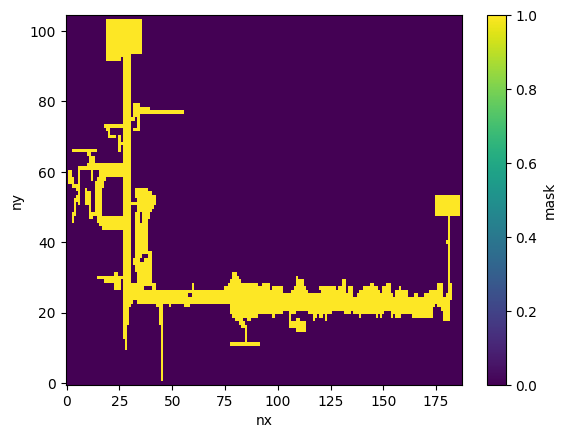

In [22]:
import numpy as np
mask = xr.where(ds.mask > 0.0, True, False)
mask.plot()

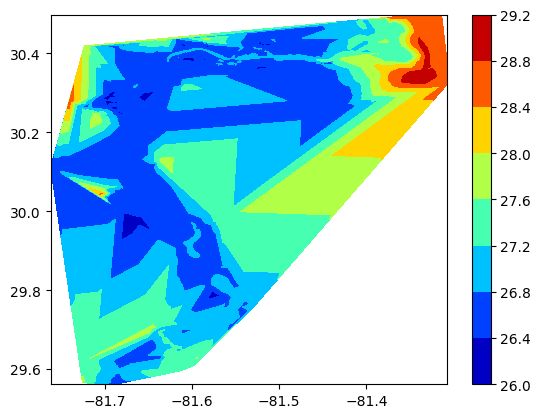

In [29]:
import matplotlib.pyplot as plt

lat = ds.lat.values[mask > 0]
lon = ds.lon.values[mask > 0]
tempp = ds.temp.cf.isel(time=0, sigma=0).values[mask > 0]

#plt.scatter(lon, lat, c=tempp, s=0.1)

plt.tricontourf(lon, lat, tempp, cmap='jet')
plt.colorbar()

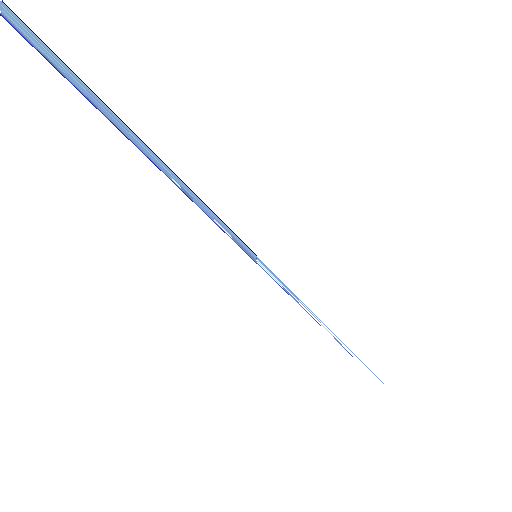

In [14]:
import datashader as dsh
import datashader.transfer_functions as tf

min_lon = ds.lon.min().values.item()
max_lon = ds.lon.max().values.item()
min_lat = ds.lat.min().values.item()
max_lat = ds.lat.max().values.item()

cvs = dsh.Canvas(
            plot_height=512,
            plot_width=512,
            x_range=(min_lon, max_lon),
            y_range=(min_lat, max_lat),
)

mask = xr.where(ds.mask, True, False)
da = ds.temp.isel(time=0, sigma=0)
da = da.assign_coords(longitude=ds.lon, latitude=ds.lat)

tf.shade(
            cvs.quadmesh(
                da,
                x='longitude',
                y='latitude',
            ),
            how="linear",
        )